In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import os
os.getcwd()

'/home/jovyan/GlioGrade/data_visuals'

In [21]:
df = pd.read_csv("patient_level_comprehensive_features_fixed.csv")

In [22]:
os.makedirs("data_visuals", exist_ok=True)


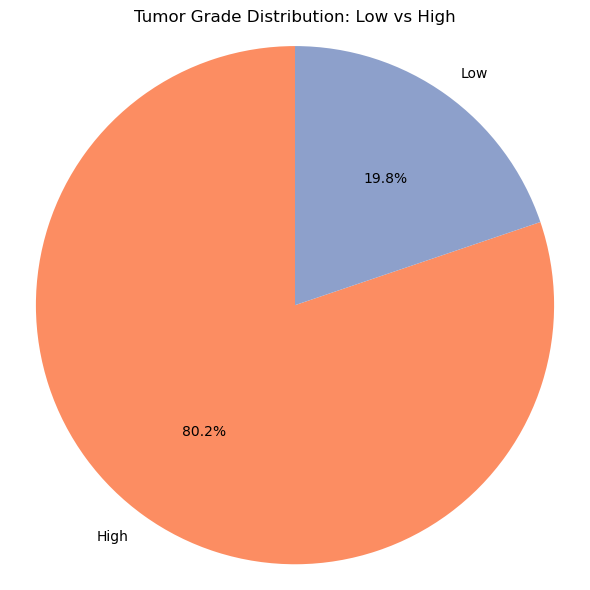

In [23]:
# Collapse WHO grades: 2 and 3 → "Low", 4 → "High"
df['grade_group'] = df['who_grade'].replace({2: 'Low', 3: 'Low', 4: 'High'})

grade_counts = df['grade_group'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    grade_counts,
    labels=grade_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#fc8d62", "#8da0cb"]
)
plt.title("Tumor Grade Distribution: Low vs High")
plt.axis('equal')

# Save and show
plt.tight_layout()
plt.savefig("data_visuals/who_grade_piechart_low_high.png")
plt.show()

In [24]:
def plot_violin_ttest(df, group_col, value_col, colors, order=['Low', 'High'], y_label=None, save_path=None):
    from scipy.stats import ttest_ind
    
    low = df[df[group_col] == order[0]][value_col]
    high = df[df[group_col] == order[1]][value_col]
    
    t_stat, p_value = ttest_ind(low, high, equal_var=False)
    if p_value < 0.001:
        sig_label = '***'
    elif p_value < 0.01:
        sig_label = '**'
    elif p_value < 0.05:
        sig_label = '*'
    else:
        sig_label = ''
    
    plt.figure(figsize=(6, 5))
    sns.violinplot(
        data=df,
        x=group_col,
        y=value_col,
        palette=colors,
        inner='box',
        hue=group_col,
        legend=False,
        order=order
    )
    
    sns.stripplot(
        data=df,
        x=group_col,
        y=value_col,
        color='gray',
        alpha=0.3,
        jitter=True,
        order=order
    )
    
    if sig_label:
        ylim = plt.gca().get_ylim()           # get current y axis limits
        y_pos = ylim[1] - (ylim[1] - ylim[0]) * 0.10  # 10% *below* top y-limit
        plt.text(0.5, y_pos, sig_label, ha='center', va='bottom', fontsize=16)

    plt.title(f"{y_label or value_col} by Tumor Grade")
    plt.xlabel("Tumor Grade Group")
    plt.ylabel(y_label or value_col)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    plt.show()

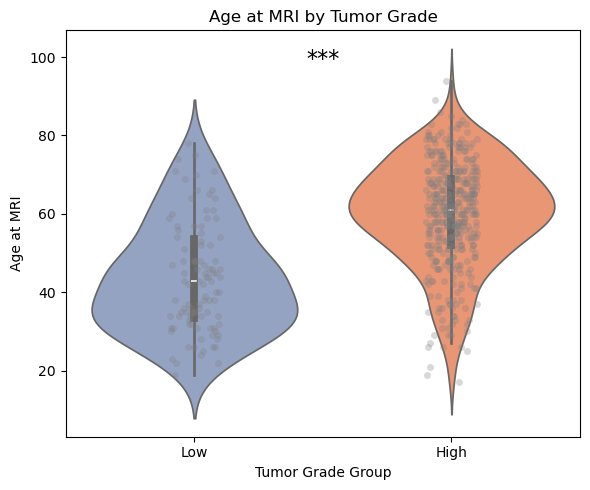

In [25]:
colors = ["#fc8d62", "#8da0cb"]  # High=red, Low=blue

plot_violin_ttest(df, 'grade_group', 'age_at_mri', colors, y_label="Age at MRI", save_path="data_visuals/age_at_mri_violinplot.png")

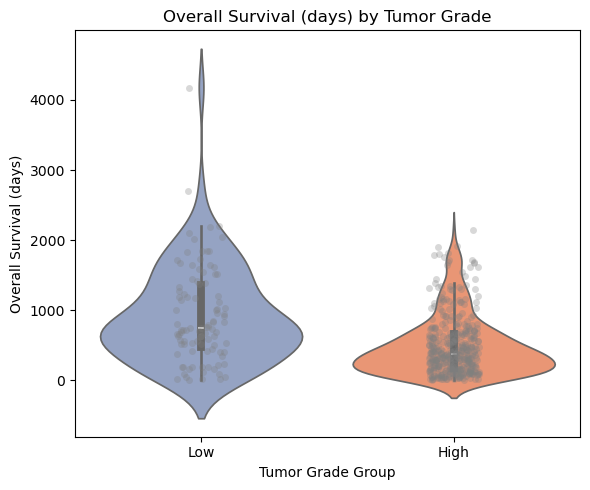

In [26]:
plot_violin_ttest(df, 'grade_group', 'overall_survival_days', colors, y_label="Overall Survival (days)", save_path="data_visuals/overall_survival_violinplot.png")

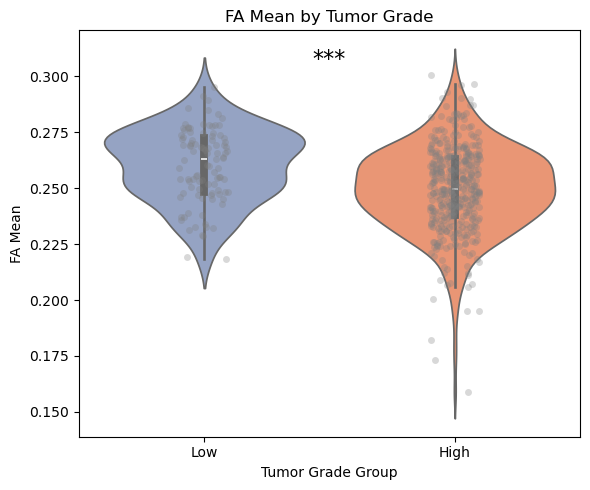

In [27]:
plot_violin_ttest(df, 'grade_group', 'fa_mean', colors, y_label="FA Mean", save_path="data_visuals/fa_mean_violinplot.png")

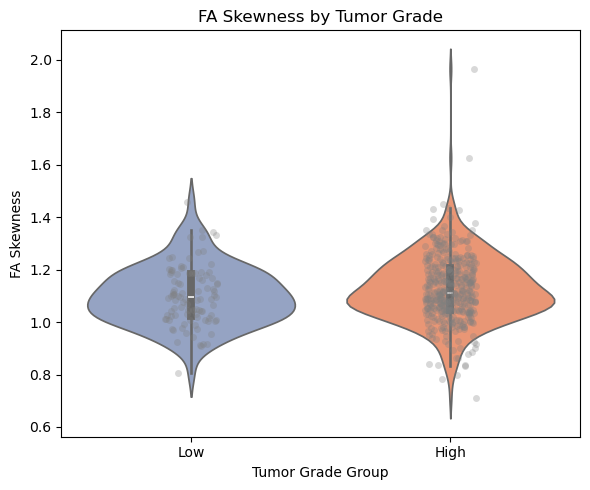

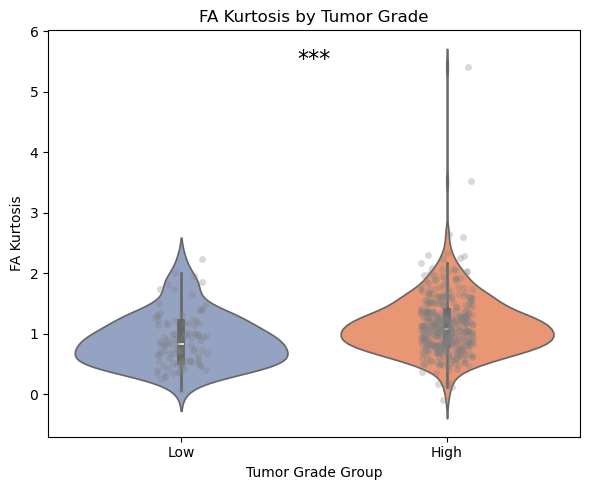

In [28]:
plot_violin_ttest(df, 'grade_group', 'fa_skewness', colors, y_label="FA Skewness", save_path="data_visuals/fa_skew_violinplot.png")

plot_violin_ttest(df, 'grade_group', 'fa_kurtosis', colors, y_label="FA Kurtosis", save_path="data_visuals/fa_kurtosis_violinplot.png")


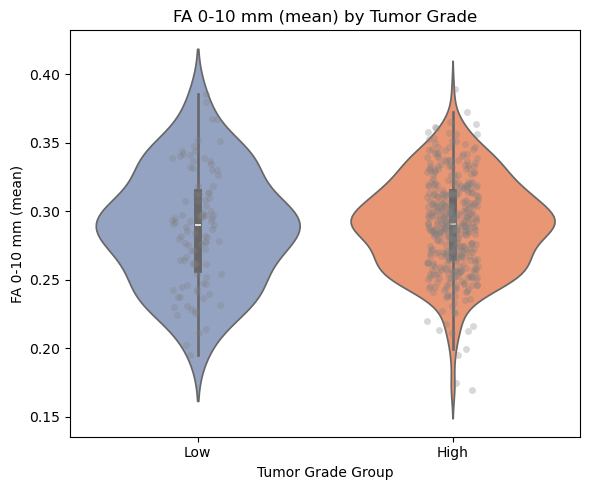

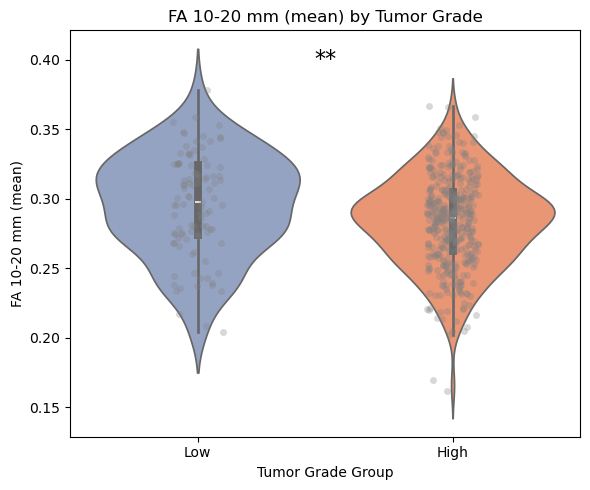

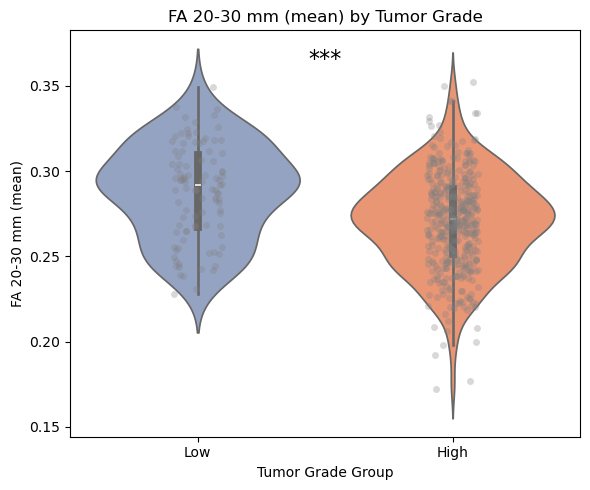

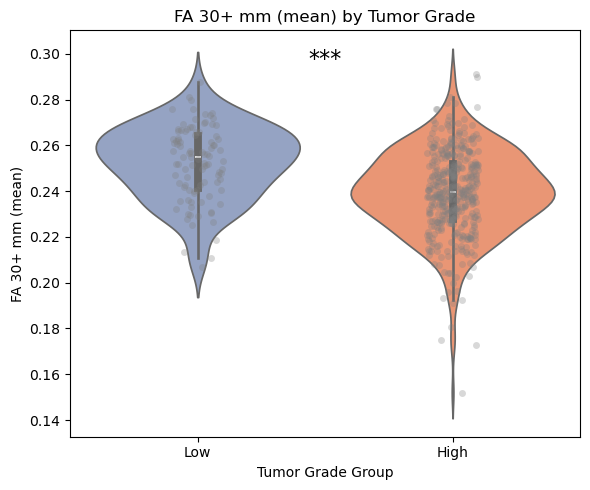

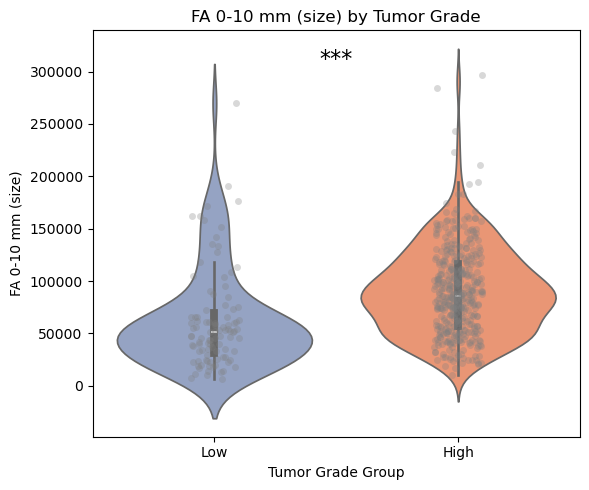

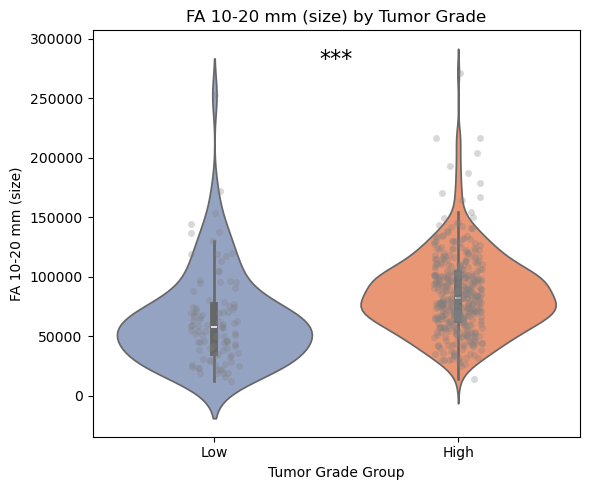

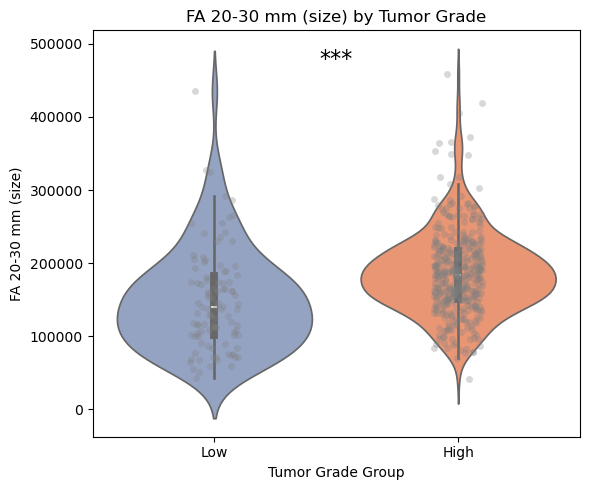

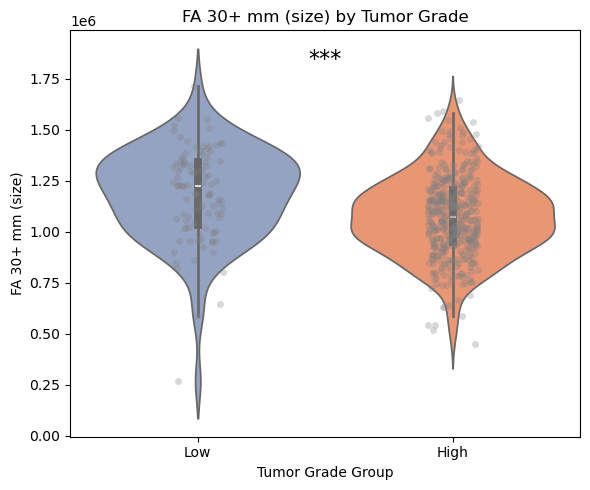

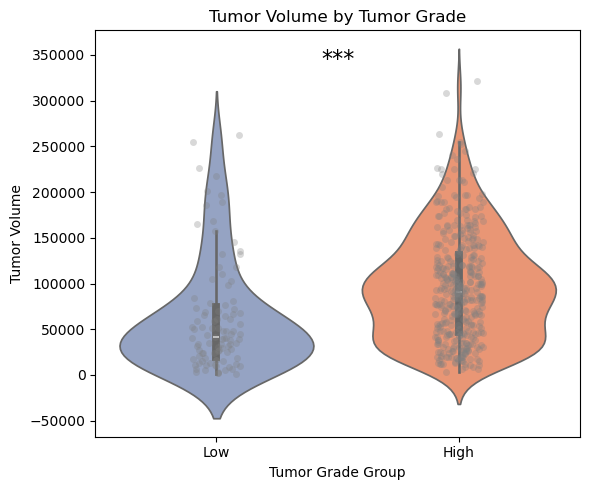

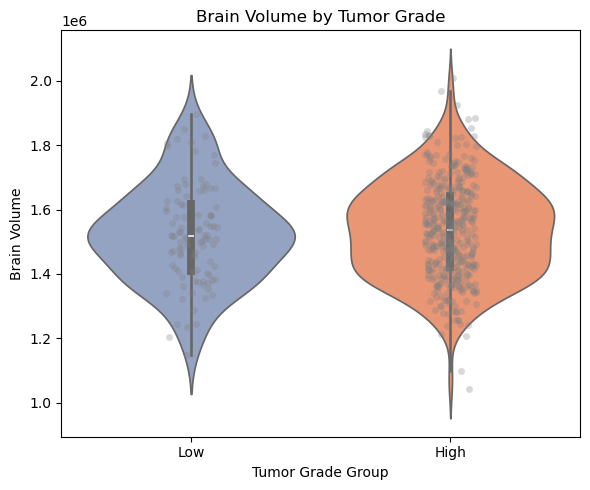

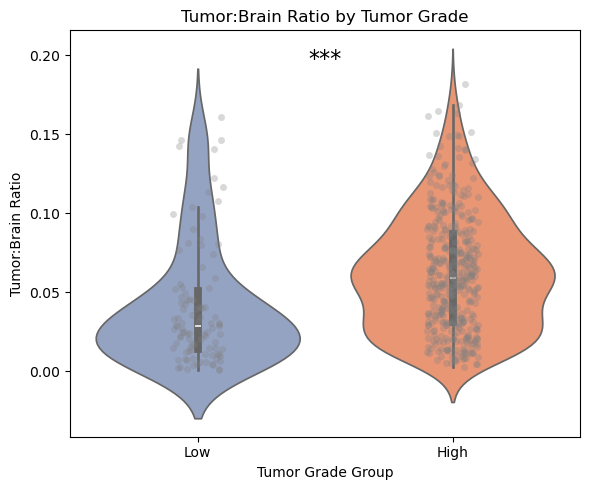

In [29]:
plot_violin_ttest(df, 'grade_group', 'boundary_shell_0_fa_mean', colors, y_label="FA 0-10 mm (mean)", save_path="data_visuals/fa_shell0mean_violinplot.png")
plot_violin_ttest(df, 'grade_group', 'boundary_shell_1_fa_mean', colors, y_label="FA 10-20 mm (mean)", save_path="data_visuals/fa_shell1mean_violinplot.png")
plot_violin_ttest(df, 'grade_group', 'boundary_shell_2_fa_mean', colors, y_label="FA 20-30 mm (mean)", save_path="data_visuals/fa_shell2mean_violinplot.png")
plot_violin_ttest(df, 'grade_group', 'boundary_shell_3_fa_mean', colors, y_label="FA 30+ mm (mean)", save_path="data_visuals/fa_shell3mean_violinplot.png")

plot_violin_ttest(df, 'grade_group', 'boundary_shell_0_voxel_count', colors, y_label="FA 0-10 mm (size)", save_path="data_visuals/fa_shell0size_violinplot.png")
plot_violin_ttest(df, 'grade_group', 'boundary_shell_1_voxel_count', colors, y_label="FA 10-20 mm (size)", save_path="data_visuals/fa_shell1size_violinplot.png")
plot_violin_ttest(df, 'grade_group', 'boundary_shell_2_voxel_count', colors, y_label="FA 20-30 mm (size)", save_path="data_visuals/fa_shell2size_violinplot.png")
plot_violin_ttest(df, 'grade_group', 'boundary_shell_3_voxel_count', colors, y_label="FA 30+ mm (size)", save_path="data_visuals/fa_shell3size_violinplot.png")

plot_violin_ttest(df, 'grade_group', 'tumor_volume', colors, y_label="Tumor Volume", save_path="data_visuals/tumorvolume_violinplot.png")
plot_violin_ttest(df, 'grade_group', 'brain_volume', colors, y_label="Brain Volume", save_path="data_visuals/brainvolume_violinplot.png")
plot_violin_ttest(df, 'grade_group', 'tumor_brain_ratio', colors, y_label="Tumor:Brain Ratio", save_path="data_visuals/tumorbrainratio_violinplot.png")

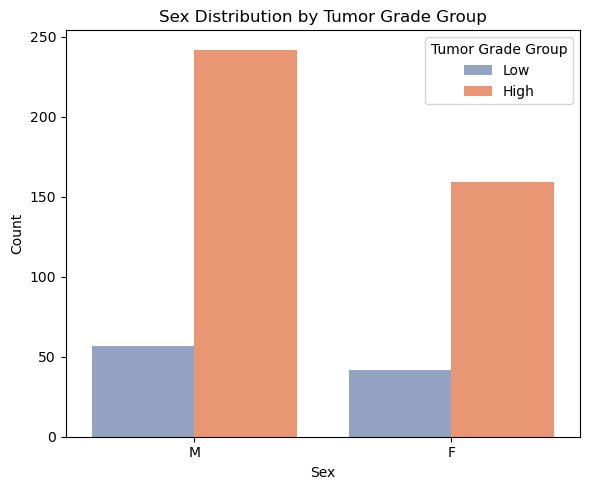

In [30]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='sex', hue='grade_group', palette=["#8da0cb", "#fc8d62"], order=['M', 'F'], hue_order=['Low', 'High'])
plt.title("Sex Distribution by Tumor Grade Group")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Tumor Grade Group')
plt.tight_layout()
plt.savefig("data_visuals/sex_barchart.png")
plt.show()

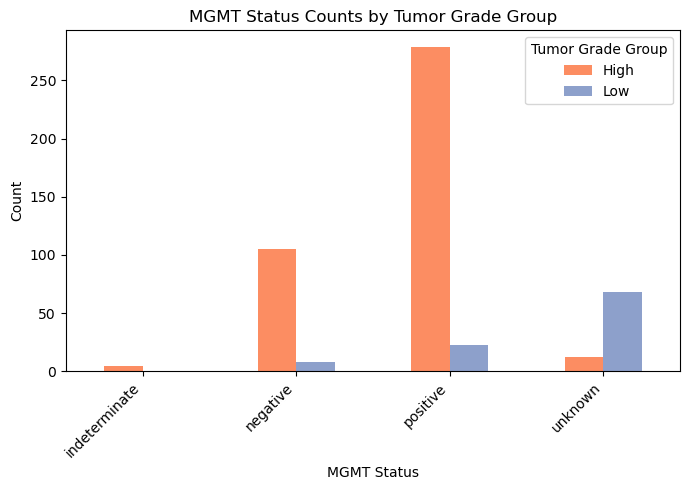

In [38]:
# Get counts of mgmt_status per grade_group
count_df = df.groupby(['mgmt_status', 'grade_group']).size().reset_index(name='count')

# Pivot for plotting grouped bars easily
pivot_df = count_df.pivot(index='mgmt_status', columns='grade_group', values='count').fillna(0)

colors = {"Low": "#8da0cb", "High": "#fc8d62"}

# Plot grouped bar chart manually
pivot_df.plot(
    kind='bar',
    color=[colors[col] for col in pivot_df.columns],
    figsize=(7,5)
)

plt.title("MGMT Status Counts by Tumor Grade Group")
plt.xlabel("MGMT Status")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tumor Grade Group')
plt.tight_layout()
plt.savefig("data_visuals/mgmt_status_by_grade_group.png")
plt.show()


In [31]:
total_subjects = len(df)
print(f"Total subjects: {total_subjects}")


Total subjects: 500


In [32]:
sex_counts = df['sex'].value_counts()
print("Sex counts:\n", sex_counts)


Sex counts:
 sex
M    299
F    201
Name: count, dtype: int64


In [33]:
mean_age = df['age_at_mri'].mean()
std_age = df['age_at_mri'].std()
print(f"Mean age: {mean_age:.2f} years")
print(f"Standard deviation: {std_age:.2f} years")


Mean age: 56.85 years
Standard deviation: 15.03 years


In [34]:
grade_counts = df['who_grade'].value_counts().sort_index()
print("WHO Grade counts:\n", grade_counts)


WHO Grade counts:
 who_grade
2     56
3     43
4    401
Name: count, dtype: int64


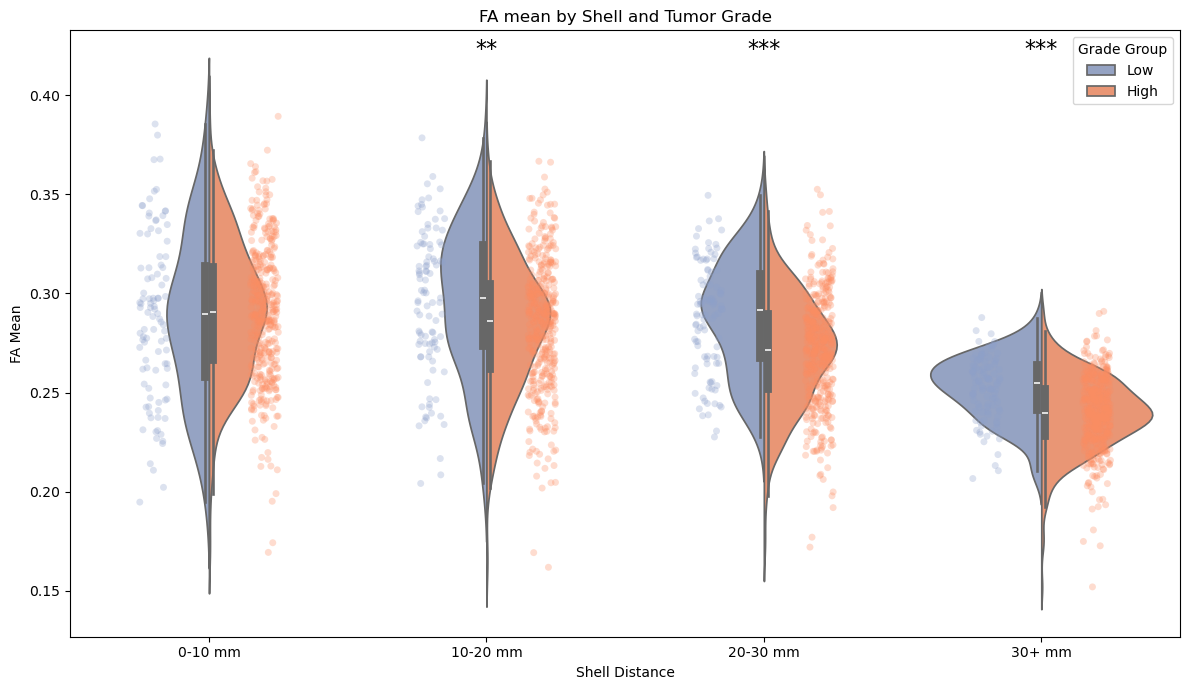

In [48]:
grade_order = ['Low', 'High']
palette_ordered = ["#8da0cb", "#fc8d62"]  # Low = blueish, High = reddish

plt.figure(figsize=(12, 7))

ax = sns.violinplot(
    data=df_long,
    x='shell',
    y='fa_mean',
    hue='grade_group',
    split=True,
    palette=palette_ordered,
    order=sorted(df_long['shell'].unique()),
    hue_order=grade_order
)

sns.stripplot(
    data=df_long,
    x='shell',
    y='fa_mean',
    hue='grade_group',
    dodge=True,
    palette=palette_ordered,
    alpha=0.3,
    jitter=True,
    order=sorted(df_long['shell'].unique()),
    hue_order=grade_order,
    ax=ax
)

def p_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

for i, shell in enumerate(sorted(df_long['shell'].unique())):
    group1 = df_long[(df_long['shell'] == shell) & (df_long['grade_group'] == grade_order[0])]['fa_mean']
    group2 = df_long[(df_long['shell'] == shell) & (df_long['grade_group'] == grade_order[1])]['fa_mean']
    t_stat, p_val = ttest_ind(group1, group2)
    stars = p_to_stars(p_val)

    if stars:
        ylim = ax.get_ylim()
        y_pos = ylim[1] - (ylim[1] - ylim[0]) * 0.05
        ax.text(i, y_pos, stars, ha='center', va='bottom', fontsize=16, color='black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:len(grade_order)], labels[0:len(grade_order)], title='Grade Group')

plt.xlabel("Shell Distance")
plt.ylabel("FA Mean")
plt.title("FA mean by Shell and Tumor Grade")
plt.tight_layout()
plt.show()
